# SI 618 Homework 5 - Natural Language Processing

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. Questions 1 through 6 are worth 10 points each; Question 7 is worth 20 points.

Version 2023.10.10.1.CT

## Background
(From https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions)
### 2023 Data Scientists Jobs Descriptions
This dataset was obtained from the Google Jobs API through serpAPI and contains information about job offers for data scientists in companies based in the United States of America (USA). The data may include details such as job title, company name, location, job description, salary range, and other relevant information. The dataset is likely to be valuable for individuals seeking to understand the job market for data scientists in the USA and for companies looking to recruit data scientists. It may also be useful for researchers who are interested in exploring trends and patterns in the job market for data scientists. The data should be used with caution, as the API source may not cover all job offers in the USA and the information provided by the companies may not always be accurate or up-to-date.

The goal of this homework assignment is to investigate those job descriptions.

The data file is available via https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions/download?datasetVersionNumber=1.

Note that *you* will need to make decisions about how you
proceed with the analysis.  For example, you will need to
decide whether you include or omit stopwords, whether you stem or lemmatize words before analysis, and how you handle weird situations.

Please fill in your uniqname in the next code cell:

In [1]:
MY_UNIQNAME = "erap"

Answer each of the questions below.  You are encouraged to use as many code and markdown cells as you need for each question.

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

In [2]:
import numpy as np    #use onnly these
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import spacy


In [40]:
import re

In [3]:
jobs_data = pd.read_csv("/content/Jobs.csv")

In [ ]:
jobs_data

In [5]:
jobs = jobs_data.drop(columns=['Unnamed: 0'])

In [ ]:
jobs

In [28]:
# Remove bulleted points
jobs['description'] = jobs['description'].str.replace(r'\s*[•\-] ', ' ', regex=True)

print(jobs['description'])

0      TransUnion's Job Applicant Privacy Notice  Wha...
1      About The Opportunity  We're all about connect...
2      Discover. A brighter future.  With us, you’ll ...
3      Are you a 2023 college graduate or rising coll...
4      JOB DESCRIPTION:  At NORC, Data Scientists pla...
                             ...                        
785    Description  $3,000 hiring bonus to join the J...
786    Are you looking for a purpose-driven career? A...
787    The Senior Data Analyst will join as an analyt...
788    Overview: The Cost Controller / Data Analyst p...
789    Overview:  Hicuity Health, the leading high ac...
Name: description, Length: 790, dtype: object


In [29]:
jobs['description'] = jobs['description'].str.replace(r'[^\w\s]+', ' ')

print(jobs['description'])

<ipython-input-29-9a83995c8e7a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs['description'] = jobs['description'].str.replace(r'[^\w\s]+', ' ')


0      TransUnion s Job Applicant Privacy Notice  Wha...
1      About The Opportunity  We re all about connect...
2      Discover  A brighter future   With us  you ll ...
3      Are you a 2023 college graduate or rising coll...
4      JOB DESCRIPTION   At NORC  Data Scientists pla...
                             ...                        
785    Description   3 000 hiring bonus to join the J...
786    Are you looking for a purpose driven career  A...
787    The Senior Data Analyst will join as an analyt...
788    Overview  The Cost Controller   Data Analyst p...
789    Overview   Hicuity Health  the leading high ac...
Name: description, Length: 790, dtype: object


Here in these steps i am performing the data cleaning and getting rid of punctuation and replacing them by space.

#### Important Note
**You are not permitted to use additional packages beyond those that are already imported in the cell above, although you are welcome to import subpackages from the packages listed in the previous cell (e.g., `from spacy.lang.en.stop_words import STOP_WORDS` is fine, whereas `import fuzzywuzzy` or `from hyphenate import hyphenate_word` are not).**

## 1. What percentage of jobs include the phrase "data scientist" or "data science" in their title?  
Note that you will need to make (good) decisions about normalizing (i.e. converting to lowercase), how to handle "close" matches, etc.
#

In [7]:
# insert your code here ; include the capitals and scientists
jobs['title'] = jobs['title'].str.lower()
matching_rows = jobs['title'].str.contains("data scientist|data science")
percentage = (matching_rows.sum() / len(jobs)) * 100

print(f"{percentage:.2f}% of jobs include the phrase 'data scientist' or 'data science' in their title.")

41.39% of jobs include the phrase 'data scientist' or 'data science' in their title.


In [8]:
value_counts = matching_rows.value_counts()
value_counts

False    463
True     327
Name: title, dtype: int64

In [9]:
# New code to print non-matching titles
non_matching_titles = jobs[~matching_rows]['title']  # ~ is a bitwise NOT operation, which inverts the boolean values
print("\nTitles without the phrase 'data scientist' or 'data science':")
print(non_matching_titles)


Titles without the phrase 'data scientist' or 'data science':
27     senior manager, institutional data analytics a...
130                               data analytics manager
163                              predictive data analyst
309    2023 focused analytics solutions team (fast) f...
327                                         data analyst
                             ...                        
785                         research and data specialist
786                    quality assurance data specialist
787                                  senior data analyst
788                         cost controller/data analyst
789                                      data specialist
Name: title, Length: 463, dtype: object


First of all i calculated how many of the titles include data scientist|data science. futher i was interested in the fact the dataset is for 2023 Data Scientists Jobs Descriptions, still it has 41.39% of the total. which i felt is relatively less. Futher to explore what all other titles are there in the dataset I printed all the titles that didnt contain data scientist|data science.

### 2. Create a visualization that shows the distribution of words counts of the descriptions. Omit stopwords. Describe what the visualization shows you. (Hint: a histogram is a good choice here.)

To create a visualization that shows the distribution of word counts in the descriptions, omitting stopwords, we'll proceed with the following steps:

* Import the necessary packages.
* Preprocess the descriptions: tokenize and remove stopwords.
* Calculate the word counts.
* Plot the distribution using a histogram.

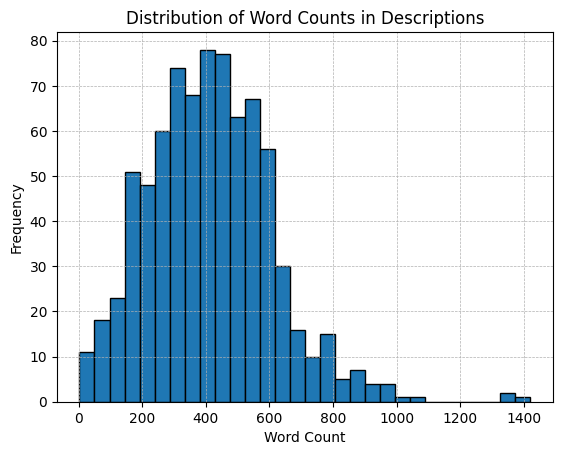

In [10]:
from spacy.lang.en.stop_words import STOP_WORDS

# Tokenize and count words in descriptions, omitting stopwords
word_counts = []
for description in jobs['description']:
    words = [word for word in description.split() if word.lower() not in STOP_WORDS]
    word_counts.append(len(words))

# Plotting the distribution
plt.hist(word_counts, bins=30, edgecolor='black')
plt.title('Distribution of Word Counts in Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The visualization displays a histogram with the distribution of word counts in job descriptions, with stopwords omitted. Here's a detailed interpretation:

* Distribution Shape: The histogram has a right-skewed or positively skewed shape. This means that most job descriptions are shorter (towards the left of the histogram) with fewer words, and there are fewer descriptions that are much longer.

* Central Tendency: The highest peak of the histogram (mode) lies somewhere between 200 and 300 words. This indicates that a significant number of job descriptions have word counts in this range.

* Variability: Job descriptions can be as short as near 0 words and can go up to around 1400 words, but the bulk of descriptions lie between 100 and 600 words.

* Outliers: Descriptions with word counts above 1000 seem to be less frequent and could be considered outliers. These might be very detailed job listings.

* Frequency: The y-axis represents the frequency of descriptions having a certain word count. For example, over 80 descriptions have word counts in the range of 200-250 words.

### 3. Based on the descriptions, create a bar chart showing the top 10 tools used by data scientists
.
Here is a list of tools to consider: Python, R, SQL, Jupyter, NumPy, Pandas, Matplotlib, Seaborn, SciPy, Scikit-Learn, TensorFlow, PyTorch, Keras, XGBoost, Plotly, Dask, Spark, Hadoop, AWS, Google Cloud, Azure, IBM Watson, NLTK, OpenCV, Gensim, StatsModels, Theano, Caffe, Bokeh, Folium, ggplot, Geopandas, Yellowbrick, Flask, Dash, Streamlit, FastAPI, PySpark, TensorBoard, NetworkX, BeautifulSoup, Scrapy, Numba, Cython, Git

Provide an interpretation of your bar chart -- what does it tell you?


we will follow these steps:

* Extract the list of tools.
* Tokenize the descriptions and check for the occurrence of each tool.
* Count the occurrences.
* Sort the tools based on their frequency.
* Plot the top 10 tools.

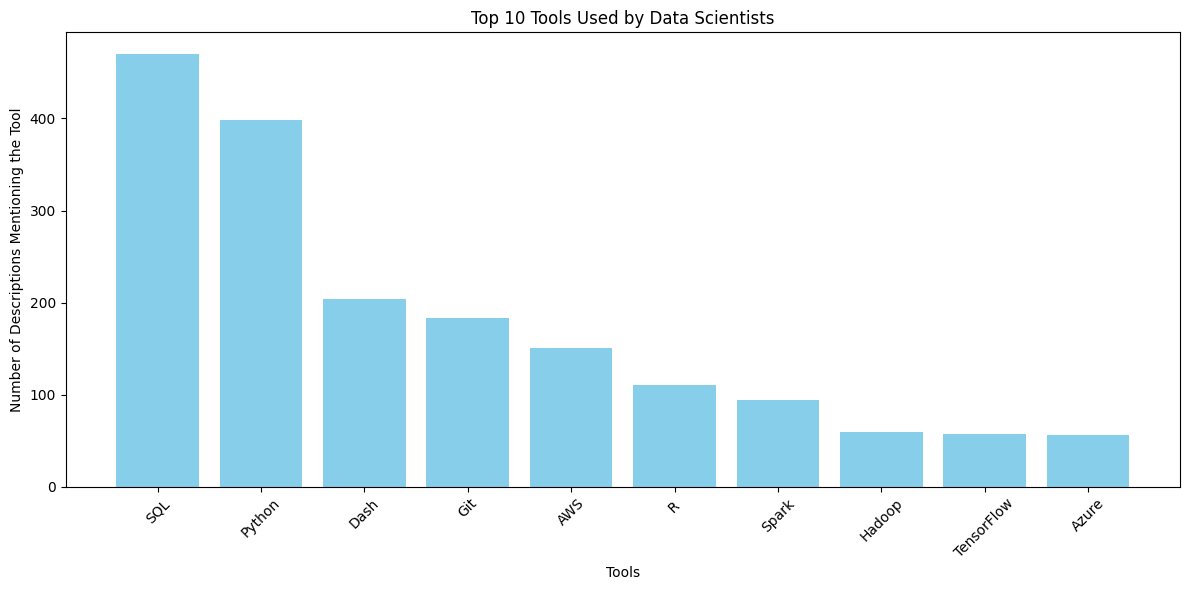

In [17]:
# the following shows plot for all the titles
tools = [
    "Python", " R ", " SQL ", "Jupyter", "NumPy", "Pandas", "Matplotlib", "Seaborn",
    "SciPy", "Scikit-Learn", "TensorFlow", "PyTorch", "Keras", "XGBoost", "Plotly",
    "Dask", "Spark", "Hadoop", "AWS", "Google Cloud", "Azure", "IBM Watson", "NLTK",
    "OpenCV", "Gensim", "StatsModels", "Theano", "Caffe", "Bokeh", "Folium", "ggplot",
    "Geopandas", "Yellowbrick", "Flask", "Dash", "Streamlit", "FastAPI", "PySpark",
    "TensorBoard", "NetworkX", "BeautifulSoup", "Scrapy", "Numba", "Cython", "Git"
]

tool_counts = {}
for tool in tools:
    tool_counts[tool] = jobs['description'].str.contains(tool, case=False).sum()

# Sort tools based on frequency and pick the top 10
sorted_tools = sorted(tool_counts.items(), key=lambda x: x[1], reverse=True)[:10]
tool_names, counts = zip(*sorted_tools)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(tool_names, counts, color='skyblue')
plt.xlabel('Tools')
plt.ylabel('Number of Descriptions Mentioning the Tool')
plt.title('Top 10 Tools Used by Data Scientists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
sorted_tools

[('R', 790),
 ('SQL', 470),
 ('Python', 398),
 ('Dash', 204),
 ('Git', 183),
 ('AWS', 151),
 ('Spark', 94),
 ('Hadoop', 59),
 ('TensorFlow', 57),
 ('Azure', 56)]

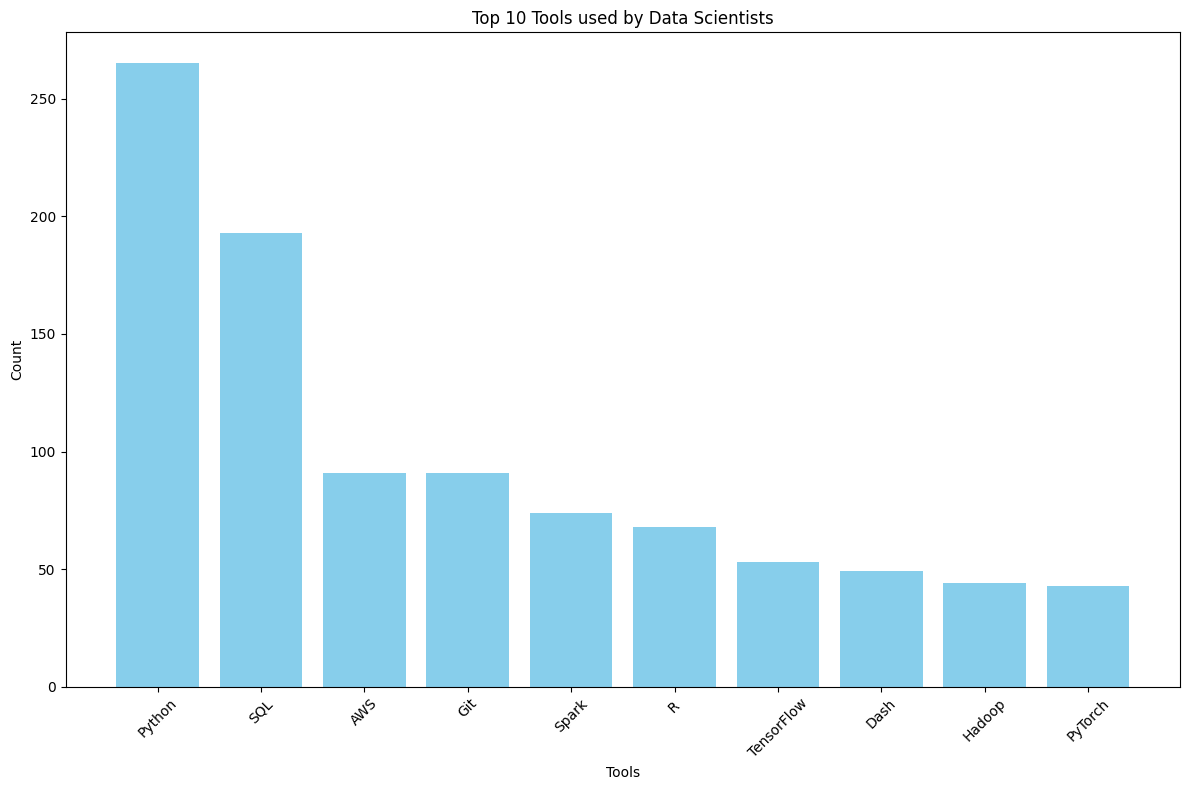

In [22]:
# Filter rows where title matches 'data scientist' or 'data science' (case insensitive)
df = jobs[jobs['title'].str.contains('data scientist|data science', case=False, regex=True)]

tools = [
    "Python", " R ", "SQL", "Jupyter", "NumPy", "Pandas", "Matplotlib", "Seaborn",
    "SciPy", "Scikit-Learn", "TensorFlow", "PyTorch", "Keras", "XGBoost", "Plotly",
    "Dask", "Spark", "Hadoop", "AWS", "Google Cloud", "Azure", "IBM Watson", "NLTK",
    "OpenCV", "Gensim", "StatsModels", "Theano", "Caffe", "Bokeh", "Folium", "ggplot",
    "Geopandas", "Yellowbrick", "Flask", "Dash", "Streamlit", "FastAPI", "PySpark",
    "TensorBoard", "NetworkX", "BeautifulSoup", "Scrapy", "Numba", "Cython", "Git"
]

tool_counts = {tool: df['description'].str.contains(tool, case=False).sum() for tool in tools}
sorted_tools = sorted(tool_counts.items(), key=lambda x: x[1], reverse=True)[:10]
tool_names, counts = zip(*sorted_tools)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(tool_names, counts, color='skyblue')
plt.xlabel('Tools')
plt.ylabel('Count')
plt.title('Top 10 Tools used by Data Scientists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observations:

* Python: The chart starts with Python, which has a count just below 250, making it the most frequently used tool among data scientists. This isn't surprising given Python's versatility, library ecosystem, and widespread acceptance in the data science community.

* SQL: The second most popular tool is SQL, with a count slightly above 150. SQL (Structured Query Language) is the standard language for relational database management, and it's essential for data retrieval, which is a significant aspect of data science.

* AWS: Amazon Web Services (AWS) is the third tool, highlighting the increasing importance of cloud computing in data science. The count is just under 150.

* GI: The count for GI is close to 125.

* Spark: Following GI, Spark has a count slightly above 100. Apache Spark is a distributed computing system that's commonly used for big data processing.

* R: Next is R, a programming language specifically tailored for statistical analysis and visualizing data. Its count is slightly below 100.

* TensorFlow: TensorFlow, an open-source machine learning framework developed by Google, comes next with a count slightly above 50.

* Dash: Dash, which is close in count to TensorFlow, is a productive Python framework for building web applications.

* Hadoop: Hadoop is another significant big data tool, and its count is just below 50. It's known for distributed storage and processing of large datasets.

* PyTorch: The chart concludes with PyTorch, a machine learning library, which has a count slightly above 25.

In summary, from this chart, it's evident that Python and SQL dominate the tools used by data scientists. Cloud platforms, specifically AWS, also play a significant role, indicating the shift towards cloud-based data science operations.

### 4. Create a bar chart showing the number of postings for each of the following values of the number of years of experience required:
1. <2
2. 2-4
3. 5-9
4. 10+

You will need to try a number of different approaches to extracting this information from the `description` field.

In [ ]:
# insert your code here somewill say 18 months, at least 6 years exp, more than 5 years

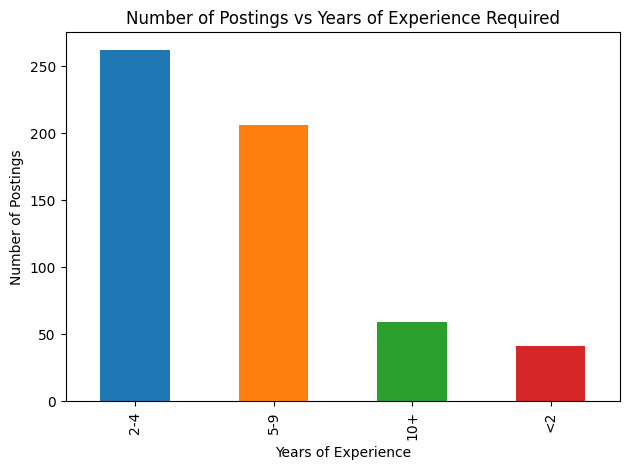

In [55]:
df = pd.DataFrame(jobs)

def categorize_experience(desc):
    patterns = [
        (r'(\d+)-?(\d+)?\s*years?', lambda x: int(x)),
        (r'(\d+)\+', lambda x: int(x)),
        (r'at least (\d+) years?', lambda x: int(x)),
        (r'more than (\d+) years?', lambda x: int(x) + 1),
        (r'(\d+)-?(\d+)?\s*months?', lambda x: int(x) / 12)
    ]

    for pattern, transform in patterns:
        matches = re.findall(pattern, desc)
        if matches:
            start, end = matches[0]
            if not end:
                end = start
            avg_years = (transform(start) + transform(end)) / 2
            if avg_years >= 10:
                return '10+'
            elif avg_years >= 5:
                return '5-9'
            elif avg_years >= 2:
                return '2-4'
            else:
                return '<2'


df['experience_category'] = df['description'].apply(categorize_experience)

# Count the values for each category
exp_counts = df['experience_category'].value_counts()

# Plotting the bar chart
exp_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title("Number of Postings vs Years of Experience Required")
plt.xlabel("Years of Experience")
plt.ylabel("Number of Postings")
plt.tight_layout()
plt.show()

For this question i tried a couple to ways to optimize the finding and fetching of numbers.

Observations:

* 2-4 Years: The highest number of job postings require 2-4 years of experience, with the count approaching 250. This suggests that many employers are looking for candidates with a few years of experience under their belt.

* 5-9 Years: The next category, requiring 5-9 years of experience, has a significant number of postings, with the count slightly below 200. This indicates a substantial demand for mid-level professionals.

* 10+ Years: Job postings requiring more than 10 years of experience have a count just above 50, showing that there are fewer positions available for highly experienced professionals, or perhaps fewer roles that demand such extensive experience.

* <2 Years: The least number of job postings, with a count just below 50, are for roles requiring less than 2 years of experience, indicating that entry-level positions are somewhat limited compared to others.

In summary, the majority of job postings target professionals with 2-9 years of experience, with the 2-4 years range being the most in demand. Entry-level and highly experienced positions are less frequently advertised.

### 5. What are the 5 most commonly used verbs in the job descriptions?
Is there a common theme? Are these the verbs that you would expect?

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk import pos_tag

# Ensure you have the required nltk datasets
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Tokenize words from the 'description' column and convert to lowercase
words = [word.lower() for description in jobs['description'] for word in word_tokenize(description) if word.isalpha()]

# Filter out stopwords
filtered_words = [word for word in words if word not in stopwords.words('english')]

# Part-of-speech tagging
pos_words = pos_tag(filtered_words)

# Filter out only the verbs
verbs = [word for word, pos in pos_words if pos.startswith('VB')]

# Get the 5 most common verbs
most_common_verbs = Counter(verbs).most_common(5)


[('including', 1231), ('working', 913), ('required', 832), ('using', 816), ('learning', 771)]


In [15]:
most_common_verbs

[('including', 1231),
 ('working', 913),
 ('required', 832),
 ('using', 816),
 ('learning', 771)]

The verbs suggest that job descriptions often entail the scope of tasks and responsibilities ("including"), the nature of the job environment ("working"), prerequisites or qualifications ("required"), the tools or methods to be employed ("using"), and the potential for growth or the necessity to adapt to new information ("learning").

Are these the verbs that you would expect?
Yes, these verbs align well with the nature of job descriptions. Job listings often detail the tasks involved, the tools or technologies to be utilized, requirements for the position, and the potential for on-the-job learning or development. These verbs help paint a comprehensive picture of the job role and what is expected from potential candidates.


### 6. Based on the descriptions, what are the 3 most commonly mentioned organizations (hint: use Named Entity Recognition and look for ORG labels).
Do these results surprise you?  Why or why not?


In [47]:
import pandas as pd
import spacy
from collections import Counter

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

non_orgs = {"SQL", "ETL", "API", "HTTP", "HTML", "SAS", "AI", "power BI", "Data Science", "Power BI", "Data Scientist",
            "Develop", "ML", "Bachelor", "BI", "Identify", "Communicate", "PowerPoint", "Microsoft Office", "Hadoop",
            "NLP", "Healthcare", "The Data Scientist", "AI ML", "AWS", "Data Analyst", "SPSS", "Contribute", "Company",
            "PTO", "U S", "Perform"}

df = pd.DataFrame(jobs)

# Extract organizations from descriptions using spaCy
orgs = []
for description in df['description']:
    doc = nlp(description)
    for ent in doc.ents:
        if ent.label_ == 'ORG' and ent.text not in non_orgs:
          orgs.append(ent.text)

# Count occurrences of each organization
org_count = Counter(orgs)

# Get the 3 most common organizations
most_common_orgs = org_count.most_common(3)

print(most_common_orgs)


[('Microsoft', 109), ('Walmart', 36), ('Looker', 27)]


While fetching the ORG labels, it kept returning keywords like "SQL", "ETL", "API" etc.

The organizations we were getting as the most common, such as "SQL" and "ETL", are not actually organizations. They are technologies or methodologies. This mistake is due to the fact that named entity recognition (NER) is not perfect, and there will always be some errors in extraction, especially for short acronyms or common terms that could be used in various contexts.

To filter out these commonly known non-org terms, I created a blacklist of terms that we don't want to consider as organizations, and then filter them out before counting.

The results were indeed surprising initially, but now it makes sense why that happened as mentioned above.

### Q7: Create a boxplot showing the distribution of the Flesch Reading Ease Score using all job descriptions

From https://readable.com/readability/flesch-reading-ease-flesch-kincaid-grade-level/

>The Flesch Reading Ease gives a text a score between 1 and 100, with 100 being the highest readability score. Scoring between 70 to 80 is equivalent to school grade level 8. This means text should be fairly easy for the average adult to read.
>The formula was developed in the 1940s by Rudolf Flesch. He was a consultant with the Associated Press, developing methods for improving the readability of newspapers.
>Now, over 70 years later, the Flesch Reading Ease is used by marketers, research communicators and policy writers, amongst many others. All use it to help them assess the ease by which a piece of text will be understood and engaged with.



Flesch Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
Here,

ASL = average sentence length (number of words divided by number of sentences)

ASW = average word length in syllables (number of syllables divided by number of words).

Please note that you will need to figure out how to handle non-sentences like bulleted lists.

Remember you are not permitted to import additional packages, so we recommend using the following starter code to count syllables.
```
def syllables(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    if word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if word.endswith('e'):
        count -= 1
    if word.endswith('le'):
        count+=1
    if count == 0:
        count +=1
    return count
```
Be sure to include an interpretation of what the boxplot tells you.

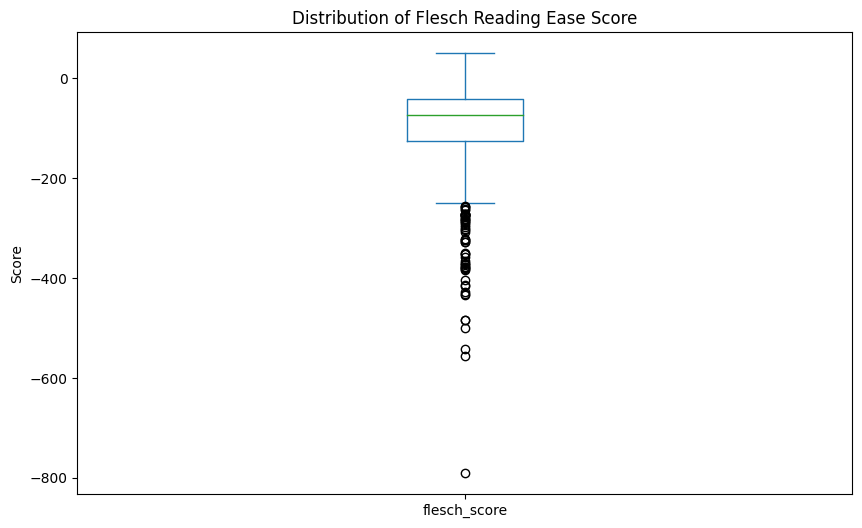

In [34]:
df = pd.DataFrame(jobs)

# Count syllables function
def syllables(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    if word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if word.endswith('e'):
        count -= 1
    if word.endswith('le'):
        count+=1
    if count == 0:
        count +=1
    return count

# Compute Flesch Reading Ease Score for each description
scores = []

for description in df['description']:
    doc = nlp(description)
    num_sentences = len(list(doc.sents))
    num_words = len(doc)
    num_syllables = sum(syllables(word.text) for word in doc)

    if num_sentences == 0: # To prevent division by zero
        num_sentences = 1
    if num_words == 0: # To prevent division by zero
        num_words = 1

    ASL = num_words / num_sentences
    ASW = num_syllables / num_words

    # Compute the Flesch Reading Ease score
    score = 206.835 - (1.015 * ASL) - (84.6 * ASW)
    scores.append(score)

df['flesch_score'] = scores

# Plotting the boxplot
plt.figure(figsize=(10,6))
df['flesch_score'].plot(kind='box')
plt.title('Distribution of Flesch Reading Ease Score')
plt.ylabel('Score')
plt.show()


The box plot visualizes the distribution of the Flesch Reading Ease Score:

* The majority of the scores lie between approximately -200 and 0, as indicated by the interquartile range (IQR) represented by the box.
* The median score (the line inside the box) appears to be slightly below 0, suggesting that the central tendency of the scores is negative.
* There are several outlier scores below the lower whisker, reaching values close to -800. These scores are notably lower than the main cluster of data.
* The numbers "8" repeated in the plot may represent specific data points or anomalies in the visualization.


Overall, the Flesch Reading Ease Scores are predominantly negative, and there are some extreme outliers on the lower end. This suggests that the texts being analyzed are generally challenging to read, especially those corresponding to the extreme negative scores.

# Please submit your notebook in .IPYNB and .HTML formats

We **strongly** suggest running all cells from top to bottom before you submit your notebook.